This notebook shows how to run the ssm-jax demos.

In [1]:
try:
    import optax
except ModuleNotFoundError:
    %pip install optax
    import optax


try:
    import tensorflow_probability as tfp
except ModuleNotFoundError:
    %pip install -qq tensorflow-probability
    import tensorflow_probability as tfp

try:
    import distrax
except ModuleNotFoundError:
    %pip install distrax
    import distrax

In [2]:
try:
    import ssm_jax
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/ssm-jax.git
    import ssm_jax 

In [2]:
# Silence WARNING:root:The use of `check_types` is deprecated and does not have any effect.
# https://github.com/tensorflow/probability/issues/1523
import logging
logger = logging.getLogger() 

class CheckTypesFilter(logging.Filter):
    def filter(self, record):
        return "check_types" not in record.getMessage()


logger.addFilter(CheckTypesFilter())

In [3]:
import jax.numpy as jnp
import jax.random as jr
from jax import jit, value_and_grad

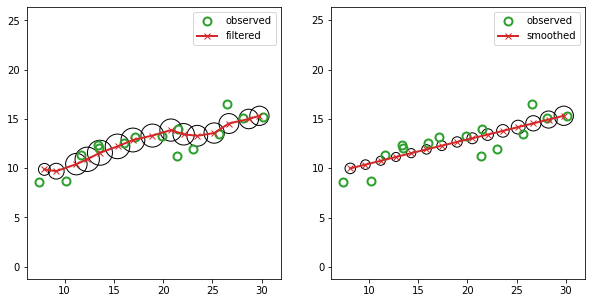

In [4]:
import ssm_jax.lgssm.demos.kf_tracking as demo

demo.main()